In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import json
import re
import ssl

import certifi
import networkx as nx

In [5]:
df = pd.read_csv("data/connections_test2.csv",encoding="utf-8-sig")

In [10]:
df.tail()

,Unnamed: 0,nazwa_pociagu,stacja_wyjazdu,stacja_przyjazdu,data,czas_rozkladowy,opoznienie,opoznienie_netto
71223,28555,MPS 88105 ZAMOYSKI,Wieleń,Krzyż,24.03,18:32,10.0,0.0
71224,28556,MPS 88105 ZAMOYSKI,Krzyż,Nowe Drezdenko,24.03,18:44,10.0,0.0
71225,28557,MPS 88105 ZAMOYSKI,Nowe Drezdenko,Strzelce Krajeńskie Wschód,24.03,18:59,10.0,0.0
71226,28558,MPS 88105 ZAMOYSKI,Strzelce Krajeńskie Wschód,Gorzów Wielkopolski Wschodni,24.03,19:24,10.0,0.0
71227,28559,MPS 88105 ZAMOYSKI,Gorzów Wielkopolski Wschodni,Gorzów Wielkopolski,24.03,19:30,8.0,-2.0


In [11]:
# szukanie nodes (nadanie)
#połączenie krawędzi na stacjach, które się rozgałęziają
#nadanie im nazwy <stacja początkowa _ stacja końcowa>


In [25]:
# szukanie większych nodesów
#(jeśli stacje się powtarzają, to są nodesami)

#niepotrzebne na ten moment
# start = df["stacja_wyjazdu"]
# start_unique =pd.DataFrame(df["stacja_wyjazdu"].unique())
# start_unique.rename(columns={0:"start"})
# start_unique["ilosc"] = 0

In [6]:
# len(start_unique), len(start)
# start_unique
unique_connections = df[['stacja_wyjazdu','stacja_przyjazdu']].drop_duplicates()

In [7]:
unique_connections.head(20)

,stacja_wyjazdu,stacja_przyjazdu
0,Warszawa Wschodnia,Warszawa Centralna
1,Warszawa Centralna,Warszawa Zachodnia
2,Warszawa Zachodnia,Grodzisk Mazowiecki
3,Grodzisk Mazowiecki,Opoczno Południe
4,Opoczno Południe,Włoszczowa Północ
5,Włoszczowa Północ,Zawiercie
6,Zawiercie,Dąbrowa Górnicza
7,Dąbrowa Górnicza,Sosnowiec Główny
8,Sosnowiec Główny,Katowice
9,Katowice,Tychy


In [8]:
# start_count = unique_connections.pivot_table(index = ['stacja_wyjazdu'], aggfunc ={'stacja_przyjazdu':'count'})
start_count = pd.pivot_table(unique_connections, index = ['stacja_wyjazdu'], aggfunc ={'stacja_przyjazdu':'count'}).reset_index()

In [9]:
# start_count.rename(columns={"stacja_przyjadu":"ilosc"})
start_count

,stacja_wyjazdu,stacja_przyjazdu
0,Aleksandrów Kujawski,2
1,Augustów,2
2,Babiak,2
3,Babimost,2
4,Baciuty,3
...,...,...
415,Żary,2
416,Żmigród,2
417,Żory,2
418,Żychlin,2


In [10]:
start_nodes = start_count[start_count['stacja_przyjazdu'] !=1]
start_nodes = start_nodes[start_nodes['stacja_przyjazdu'] !=2]
start_nodes

,stacja_wyjazdu,stacja_przyjazdu
4,Baciuty,3
8,Biała Podlaska,3
9,Białogard,4
10,Białystok,5
15,Bochnia,3
...,...,...
394,Łowicz Główny,4
395,Łuków,3
396,Łódź Chojny,4
400,Łódź Widzew,5


In [11]:
glowne_nodes = np.array(start_nodes['stacja_wyjazdu']) # niech to będą te stacje, które zostają 

#dodanie stacji, które są końcowe
glowne_nodes = np.append(glowne_nodes,'Ustka')
glowne_nodes = np.append(glowne_nodes,'Terespol')
glowne_nodes = np.append(glowne_nodes, 'Zagórz')

len(glowne_nodes)

139

In [27]:
# glonwe_nodes zapisanie do pliku
file = open('super_nodes.txt','w')
for item in glowne_nodes:
	file.write(item+"\n")
file.close()

In [13]:
uniq_con_temp = unique_connections.head(30)
uniq_con_temp

,stacja_wyjazdu,stacja_przyjazdu
0,Warszawa Wschodnia,Warszawa Centralna
1,Warszawa Centralna,Warszawa Zachodnia
2,Warszawa Zachodnia,Grodzisk Mazowiecki
3,Grodzisk Mazowiecki,Opoczno Południe
4,Opoczno Południe,Włoszczowa Północ
5,Włoszczowa Północ,Zawiercie
6,Zawiercie,Dąbrowa Górnicza
7,Dąbrowa Górnicza,Sosnowiec Główny
8,Sosnowiec Główny,Katowice
9,Katowice,Tychy


In [ ]:
#schetmat działania
# - {"superwezeł_start - superwęzeł_end":['superwęzeł_start', 'kolejna_stacja', 'inna_stacja',..., 'superwęzeł_end']}


# comment 
# - może nie uwzględniać ostatniej stacji ups

## DZIAŁA I TO JEST TA POPRAWNA WERSJA - nieużywana!!

In [325]:
# AKTUALNA WERSJA - działa jeśli chodzi o listę z wierzchołkami

def new_connection_dic(glowne_nodes, uniq_con):
    """
    @glowne_nodes: superwierzchołki, czyli stacje z których wyjezdzają pociągi w róznych kierunkach
    @uniq_con: data.frame z unikalnymi połączeniami (dwie kolummny pierwsze- stacja wyjazdu i stacja przyjazdu)
    """
    new_con_dic = {}

    stations_between_tab = []
    for row in range(len(uniq_con)):
        station = uniq_con.iloc[row,0]
        prev_station_end = uniq_con.iloc[row-1,1]

        if row !=(len(uniq_con)-1):

            if station in glowne_nodes:
                stations_between_tab.append(station)
                if len(stations_between_tab) > 1: #potrzebny, bo inaczej powstawało połączenie z jednym węzłem
                    if station != prev_station_end:
                        stations_between_tab[-1] = prev_station_end
                        new_con_dic[f'{stations_between_tab[0]} - {stations_between_tab[-1]}'] = stations_between_tab
                        stations_between_tab = [station]
                    else:
                        new_con_dic[f'{stations_between_tab[0]} - {stations_between_tab[-1]}'] = stations_between_tab
                        stations_between_tab= [station]
            else:
                stations_between_tab.append(station)
                if station != prev_station_end:
                    stations_between_tab[-1] = prev_station_end
                    new_con_dic[f'{stations_between_tab[0]} - {stations_between_tab[-1]}'] = stations_between_tab
                    stations_between_tab = [station]


        else:# żeby ostatnie połączenie z tabeli było uwzględnione
            stations_between_tab.append(station)
            station_end = uniq_con.iloc[row,1]
            stations_between_tab.append(station_end)
            print('Ostatnia lista:',stations_between_tab)
            new_con_dic[f'{stations_between_tab[0]} - {stations_between_tab[-1]}'] = stations_between_tab

        # print(stations_between_tab)
    return(new_con_dic)


#nie wyświetla się ostatnie połączenie

In [336]:
# tab_head = new_connection_dic(glowne_nodes,uniq_con_temp)
# tab_head

In [328]:
# new_tab = new_connection_dic(glowne_nodes,unique_connections)
# list(new_tab.items())[-5:]


In [240]:
# len(new_tab) #1140 na początku było połączeń, teraz jest 549

In [329]:
# tail_tab = new_connection_dic(glowne_nodes,tail)
# tail_tab

In [225]:
# len(new_con_dic)
# list(new_con_dic.items())[10:]
# new_con_dic


25

## ZAMIANA W SŁOWNiku węzłów na krawędzie

In [414]:
# działa

def new_connection_dic_edges(glowne_nodes, uniq_con):
    """
    @glowne_nodes: superwierzchołki, czyli stacje z których wyjezdzają pociągi w róznych kierunkach
    @uniq_con: data.frame z unikalnymi połączeniami (dwie kolummny pierwsze- stacja wyjazdu i druga - stacja przyjazdu)

    @retrun: słownik, gdzie kluczami są super krawędzie, a w środku są mini krawędzie, które zawierając się na odcinku
    super krawędzi
    """
    new_con_dic = {}

    stations_between_tab = []
    for row in range(len(uniq_con)):
        station = uniq_con.iloc[row,0] #0 to kolumna 'stacja wyjazdu'
        station_end = uniq_con.iloc[row,1] #1 to kolumna 'stacja przyjazdu'
        prev_station = uniq_con.iloc[row-1,0]
        prev_station_end = uniq_con.iloc[row-1,1]

        if row ==(len(uniq_con)-1):
            stations_between_tab.append(f"{station}_{station_end}")
            start_node = stations_between_tab[0].split('_')[0]
            end_node = stations_between_tab[-1].split('_')[-1]
            new_con_dic[f'{start_node}_{end_node}'] = stations_between_tab
            # print(stations_between_tab)

        if station in glowne_nodes:
            if len(stations_between_tab) > 0: #potrzebny, bo inaczej powstawało połączenie z jednym węzłem
                if station != prev_station_end:
                    stations_between_tab[-1] = f"{prev_station}_{prev_station_end}"
            
                    start_node = stations_between_tab[0].split('_')[0]
                    end_node = stations_between_tab[-1].split('_')[-1]
                    new_con_dic[f'{start_node}_{end_node}'] = stations_between_tab
                    stations_between_tab = [f"{station}_{station_end}"]
                else:
                    start_node = stations_between_tab[0].split('_')[0]
                    end_node = stations_between_tab[-1].split('_')[-1]
                    new_con_dic[f'{start_node}_{end_node}'] = stations_between_tab
                    stations_between_tab= [f"{station}_{station_end}"]
            else:
                stations_between_tab.append(f"{station}_{station_end}")
        else:
            stations_between_tab.append(f"{station}_{station_end}")
            if station != prev_station_end:
                stations_between_tab[-1] = f"{prev_station}_{prev_station_end}"
                start_node = stations_between_tab[0].split('_')[0]
                end_node = stations_between_tab[-1].split('_')[-1]
                new_con_dic[f'{start_node}_{end_node}'] = stations_between_tab
                stations_between_tab = [f"{station}_{station_end}"]
                
    return(new_con_dic)


In [500]:
# unique_connections.iloc[140:165]
# unique_connections[unique_connections['stacja_wyjazdu'] == 'Otwock']
# unique_connections.iloc[200:220]

In [519]:

super_edges = new_connection_dic_edges(glowne_nodes, unique_connections) # słownik z super połączeniami

In [571]:
edges_list = list(super_edges.keys())

True

In [521]:
len(super_edges)
len(super_edges.keys())

551

# tworzenie słownika z brakującymi połączeniami

In [518]:
#próba sprawdzenia gdzie się wyjebuje algorytm, że nie dodaje połączeń

missing_con = pd.read_csv("test_missing.csv",encoding="utf-8-sig")
test = new_connection_dic_edges(glowne_nodes, missing_con)



False

In [554]:
# teraz gdy brakuje aby 6
missing_con2 = pd.read_csv("test_missing.csv",encoding="utf-8-sig")
test2 = new_connection_dic_edges(glowne_nodes, missing_con2)

In [556]:
len(test2)
test2


{'Ostrów\xa0Wielkopolski_Oleśnica\xa0Rataje': ['Ostrów\xa0Wielkopolski_Krotoszyn',
  'Krotoszyn_Milicz',
  'Milicz_Oleśnica\xa0Rataje'],
 'Oleśnica\xa0Rataje_Ostrów\xa0Wielkopolski': ['Oleśnica\xa0Rataje_Milicz',
  'Milicz_Krotoszyn',
  'Krotoszyn_Ostrów\xa0Wielkopolski',
  'Krotoszyn_Ostrów\xa0Wielkopolski']}

In [1]:
# missing_con

In [355]:
# # heheheh

# def new_connection_dic_edges(glowne_nodes, uniq_con):
#     """
#     @glowne_nodes: superwierzchołki, czyli stacje z których wyjezdzają pociągi w róznych kierunkach
#     @uniq_con: data.frame z unikalnymi połączeniami (dwie kolummny pierwsze- stacja wyjazdu i druga - stacja przyjazdu)
#     """
#     new_con_dic = {}

#     stations_between_tab = []
#     for row in range(len(uniq_con)):
#         station = uniq_con.iloc[row,0] #0 to kolumna 'stacja wyjazdu'
#         station_end = uniq_con.iloc[row,1] #1 to kolumna 'stacja przyjazdu'
#         prev_station = uniq_con.iloc[row-1,0]
#         prev_station_end = uniq_con.iloc[row-1,1]

#         stations_between_tab.append(f'{station}-{station_end}')

#         if station in glowne_nodes:
#             if len(stations_between_tab) > 0:
#                 stations_between_tab.append(f'{station}-{station_end}')

#                 start_node = stations_between_tab[0].split('-')[0]
#                 end_node = stations_between_tab[-1].split('-')[-1]
#                 new_con_dic[f'{start_node} - {end_node}'] = stations_between_tab
#             else:
#                 stations_between_tab.append(f'{station}-{station_end}')
        
#         else:
#             stations_between_tab.append(f'{station}-{station_end}')


#     return(new_con_dic)

In [406]:
# new_connection_dic_edges(glowne_nodes, uniq_con_temp) #dopracować ostatnie połączenia - poprawione

In [453]:
# do sprawdzenia!!!! - sprawdzone
# ('Słupsk', 'Słupsk'),('Biała\xa0Podlaska', 'Biała\xa0Podlaska'),('Rzeszów\xa0Zachodni', 'Rzeszów\xa0Zachodni')


551

# łączenie dwóch słowników

In [557]:
# super_edges.update(test)

super_edges.update(test2)

In [558]:
len(super_edges)
# super_edges

551

In [559]:
json.dump(super_edges,open('super_edges_temp2.json',"w"))

# wyplotowanie mapy z tylko głównymi nodesami

In [3]:
# to potrzebne, bo inaczej wyskakuje GeocoderServiceError, ale ogólnie bardzo niewskazane XD
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
pos = json.load(open("station_pos_new.json","r", encoding="utf-8"))

pos["Jagodin"] = [23.895798884090656,  51.19818428908686]
pos["Jarosław"] = [22.677651659198048, 50.011096189470834]
pos["Chałupki"] = [18.311526302001212, 49.925748636690045]
pos["Kostrzyn"] = [14.647305794898253, 52.591351788760555]

In [12]:
new_pos = {}

pos_keys = list(pos.keys())
pos_val = list(pos.values())
for p in range(len(pos_keys)):
    if pos_keys[p] in glowne_nodes:
        new_pos[pos_keys[p]] = pos_val[p]

In [563]:
# len(new_pos)

In [19]:
test_trains = df["nazwa_pociagu"].unique()
nodes = list(new_pos.keys())

In [565]:
# uniq_connections = df[['stacja_wyjazdu','stacja_przyjazdu']].drop_duplicates()
# uniq_connections = [(conn[1],conn[2]) for conn in uniq_connections.itertuples()]
# uniq_connections.sort()
# uniq_connections

In [566]:
# list(super_edges.keys())

In [20]:
super_edges= json.load(open("super_edges_temp2.json","r", encoding="utf-8"))


In [21]:
super_edges_tuples = list(tuple(list(super_edges.keys())[i].split('_')) for i in range(len(super_edges)))


In [22]:
err_conn = [('Lublin\xa0Główny', 'Legnica'), ('Warszawa\xa0Gdańska', 'Łódź\xa0Widzew'),  ('Kraków\xa0Główny', 'Sokółka') , 
 ('Świnoujście', 'Białystok'),  ('Poznań\xa0Główny', 'Łódź\xa0Widzew'), ('Zielona\xa0Góra\xa0Główna', 'Lublin\xa0Główny'),
 ('Szczecin\xa0Główny','Białystok')]

for conn in err_conn:
    print("try to delete" + conn[0] + conn[1])
    try:
        super_edges_tuples.remove(conn)
    except:
        pass

try to deleteLublin GłównyLegnica
try to deleteWarszawa GdańskaŁódź Widzew
try to deleteKraków GłównySokółka
try to deleteŚwinoujścieBiałystok
try to deletePoznań GłównyŁódź Widzew
try to deleteZielona Góra GłównaLublin Główny
try to deleteSzczecin GłównyBiałystok


In [23]:
# super_edges['Szczecin\xa0Główny_Białystok'] 
# # nie ma tak prawie bezpośredniego połączenia ze szczecina do Bałegostoku

# super_edges_tuples.remove('Szczecin\xa0Główny_Białystok')
# super_edges

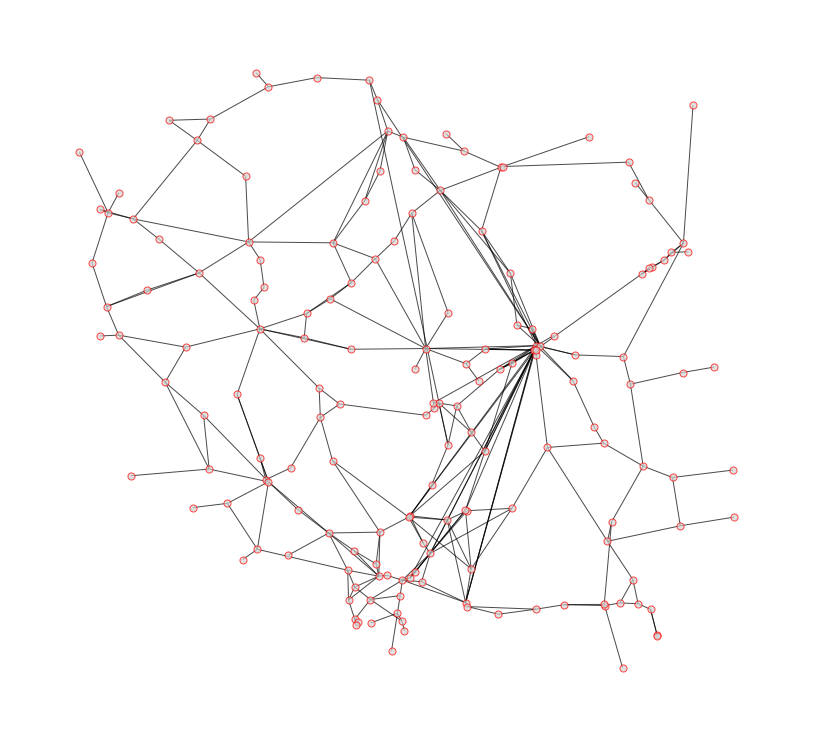

In [24]:
# SAME GŁÓWNE NODESY

plt.figure(figsize=(11,10))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(super_edges_tuples)
labels = {node: "-".join([w[:2] for w in re.split('\s',node)]) for node in G.nodes()}
nx.draw(G,pos,node_size=50,alpha=0.7,edgecolors='red', node_color='lightgray')